In [1]:
import json
import pandas as pd
import requests
import config

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# df1 = df.sort_values(by = 'popularity',ascending=False)
#Popularity is calculated by 
# Number of votes for the day
# Number of views for the day
# Number of users who marked it as a "favourite" for the day
# Number of users who added it to their "watchlist" for the day
# Release date
# Number of total votes
# Previous days score

In [5]:
#In the list pages2 I am looping through the URL for each page in the genre 
pages2 = []
for i in range(1,501):
    pages2.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=12&with_original_language=en'))

In [6]:
#pages2

In [7]:
#I am getting the request for each API URL and adding to a new list.
adv_movies = []
for page in pages2:
    adv_movies.append(requests.get(page))

In [8]:
#From the previous list adv_movies I have sucessfully been approved access and now in the new list adv_json 
#I am converting my data into json file to read the data.
adv_json = []
for movie in adv_movies:
    adv_json.append(movie.json())
    

In [10]:
#From the previous list that has been converted to a json file, our first three columns were unnecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under results.
results = []
for item in adv_json:
    results = results + item['results']

In [11]:
df1 = pd.DataFrame(results)

In [12]:
#I am making the title of the movies as the index to make it easy to read the data frame for the information for each movie
df1.set_index('title', inplace = True)

In [13]:
#I am reseting the index for later when I need to access the column title
df1.reset_index(inplace=True)

In [14]:
df1.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
1,Ad Astra,261.579,2494,False,/xBHvZcjRiWyobQ9kxBhO6B2dtRI.jpg,419704,False,/5BwqwxMEjeFtdknRV792Svo0K1v.jpg,en,Ad Astra,"[12, 18, 9648, 878, 53]",6.0,"The near future, a time when both hope and har...",2019-09-17
2,Frozen II,145.510,2626,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,330457,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 10751]",7.1,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
6,The Call of the Wild,76.884,142,False,/33VdppGbeNxICrFUtW2WpGHvfYc.jpg,481848,False,/yFRpUmsreYO5Bc0HVBTsJsHIIox.jpg,en,The Call of the Wild,"[28, 12, 16, 18, 878, 10751]",5.9,Buck is a big-hearted dog whose blissful domes...,2020-02-19
7,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29
8,Star Wars: The Rise of Skywalker,52.708,3061,False,/db32LaOibwEliAmSL2jjDF6oDdj.jpg,181812,False,/jOzrELAzFxtMx2I4uDGHOotdfsS.jpg,en,Star Wars: The Rise of Skywalker,"[28, 12, 878]",6.5,The surviving Resistance faces the First Order...,2019-12-18
9,Frozen,41.184,11204,False,/eFnGmj63QPUpK7QUWSOUhypIQOT.jpg,109445,False,/cN9Nbwh66TRcj2gBE8cSEZulsx3.jpg,en,Frozen,"[12, 16, 10751]",7.3,Young princess Anna of Arendelle dreams about ...,2013-11-27


In [15]:
# I am making a new dataframe of only title and popularity.
df_adv = df1[['title','popularity']].head(20) 
df_adv

,title,popularity
0,Jumanji: The Next Level,267.705
1,Ad Astra,261.579
2,Frozen II,145.510
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Avengers: Infinity War,84.390
6,The Call of the Wild,76.884
7,Onward,60.374
8,Star Wars: The Rise of Skywalker,52.708
9,Frozen,41.184


In [16]:
#Only pulling the popularity column
df_adv['popularity']

0     267.705
1     261.579
2     145.510
3     104.718
4      99.886
5      84.390
6      76.884
7      60.374
8      52.708
9      41.184
10     61.253
11     42.049
12     52.654
13     48.934
14     47.914
15     40.758
16     49.851
17     38.290
18     39.117
19     37.669
Name: popularity, dtype: float64

In [17]:
#Only pulling the title column
df_adv['title']

0                       Jumanji: The Next Level
1                                      Ad Astra
2                                     Frozen II
3                             Spies in Disguise
4                              Charlie's Angels
5                        Avengers: Infinity War
6                          The Call of the Wild
7                                        Onward
8              Star Wars: The Rise of Skywalker
9                                        Frozen
10                                         Cars
11                    Spider-Man: Far from Home
12                 Maleficent: Mistress of Evil
13                                      Aladdin
14                               No Time to Die
15                                The Lion King
16                                     Dolittle
17    The Hobbit: The Battle of the Five Armies
18                           Terminator Genisys
19            Spider-Man: Into the Spider-Verse
Name: title, dtype: object

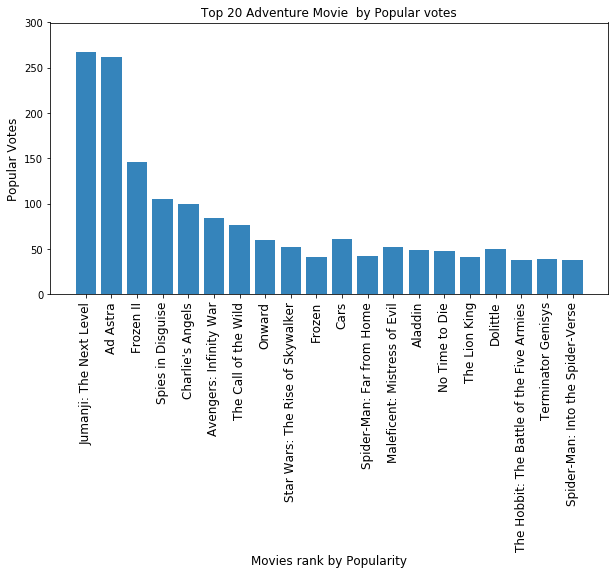

In [203]:
new_figure = plt.figure(figsize= (10,5))
#The list of title is given a new variable 
objects = df_adv['title']

popularity= df_adv['popularity']

plt.bar(objects, popularity, align='center', alpha=.9 )
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 301, step=50))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Top 20 Adventure Movie  by Popular votes',fontsize=12)

plt.show()

In [121]:
#In the list pages3 I am looping through the URL for each page in the genre
pages3 = []
for i in range(1,501):
    pages3.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=popularity.desc&include_adult=false&include_video=false&page={i}&with_genres=35&with_original_language=en'))

In [122]:
#I am getting the request for each API URL and adding to a new list.
comedy_movies = []
for page in pages3:
    comedy_movies.append(requests.get(page))

In [123]:
#From the previous list comedy_movies I have sucessfully been approved access and now in the new list _json 
#I am converting my data into json file to read the data.comedy_json = []
for movie in comedy_movies:
    comedy_json.append(movie.json())

In [124]:
results = []
for item in comedy_json:
    results = results + item['results']

In [125]:
df2 = pd.DataFrame(results)

In [126]:
df2.set_index('title', inplace = True)

In [127]:
df2.reset_index(inplace=True)

In [128]:
df2.head(30)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,A Rainy Day in New York,1194.115,597,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
1,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,Sonic the Hedgehog,205.794,568,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
5,Knives Out,83.715,2495,False,/pThyQovXQrw2m0s9x82twj48Jq4.jpg,546554,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,en,Knives Out,"[35, 80, 18, 9648, 53]",7.8,When renowned crime novelist Harlan Thrombey i...,2019-11-27
6,Guns Akimbo,79.446,43,False,/2kNnf7BwRCEm4bcFkdiE0T4U25s.jpg,457335,False,/gL7TV2g9y9p3v7occ5bLrJ2p1qs.jpg,en,Guns Akimbo,"[28, 35]",6.2,An ordinary guy suddenly finds himself forced ...,2020-02-27
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026,936,False,/h4VB6m0RwcicVEZvzftYZyKXs6K.jpg,495764,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,en,Birds of Prey (and the Fantabulous Emancipatio...,"[28, 35, 80]",6.8,"After her breakup with the Joker, Harley Quinn...",2020-02-05
8,Jojo Rabbit,65.884,2221,False,/7GsM4mtM0worCtIVeiQt28HieeN.jpg,515001,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,en,Jojo Rabbit,"[35, 18, 10752]",8.1,A World War II satire that follows a lonely Ge...,2019-10-18
9,Onward,60.374,31,False,/3VqDLgKLfNYSQYEGC5sjGhcPhn7.jpg,508439,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,en,Onward,"[12, 16, 35, 14, 10751]",7.8,"In a suburban fantasy world, two teenage elf b...",2020-02-29


In [129]:
df2.drop(df2[df2['popularity'] > 1000.0].index, inplace = True)

In [131]:
df_com = df2[['title','popularity']].head(20) 
df_com

,title,popularity
1,Jumanji: The Next Level,267.705
2,Sonic the Hedgehog,205.794
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Knives Out,83.715
6,Guns Akimbo,79.446
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026
8,Jojo Rabbit,65.884
9,Onward,60.374
10,Zombieland: Double Tap,39.758


In [132]:
df_com.describe()

,popularity
count,20.000000
mean,77.186950
std,59.725565
min,33.062000
25%,42.142250
50%,55.935500
75%,86.042750
max,267.705000


In [ ]:
# In certain cases the median would be best to test for skewed data. 
# The mean is the average of the data. We can see the mean and median are very similiar therefore 
# we can see there is a symmetrical distribution. 

In [133]:
df_com['popularity']

1     267.705
2     205.794
3     104.718
4      99.886
5      83.715
6      79.446
7      93.026
8      65.884
9      60.374
10     39.758
11     61.253
12     51.497
13     48.834
14     33.062
15     48.934
16     49.851
17     37.669
18     42.937
19     34.520
20     34.876
Name: popularity, dtype: float64

In [134]:
df_com['title']

1                               Jumanji: The Next Level
2                                    Sonic the Hedgehog
3                                     Spies in Disguise
4                                      Charlie's Angels
5                                            Knives Out
6                                           Guns Akimbo
7     Birds of Prey (and the Fantabulous Emancipatio...
8                                           Jojo Rabbit
9                                                Onward
10                               Zombieland: Double Tap
11                                                 Cars
12                       Once Upon a Time… in Hollywood
13                                    The Addams Family
14                                             Hustlers
15                                              Aladdin
16                                             Dolittle
17                    Spider-Man: Into the Spider-Verse
18                    To All the Boys I've Loved

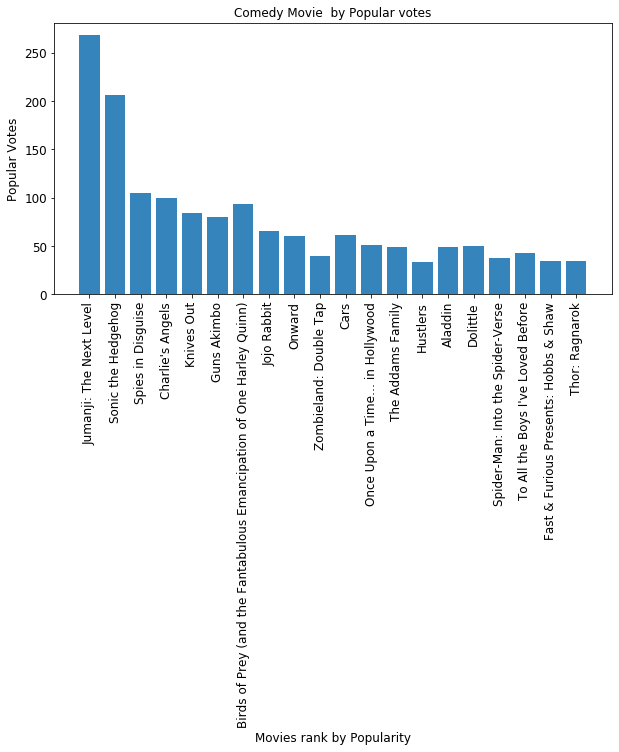

In [204]:
new_figure = plt.figure(figsize= (10,5))
objects = df_com['title']
# y_pos = np.arange(len(objects))
popularity= df_com['popularity']

plt.bar(objects, popularity, align='center', alpha=0.9)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(1, 300, step=50),fontsize=12)
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popularity',fontsize=12)
plt.title('Comedy Movie  by Popular votes',fontsize=12)

plt.show()

## Revenue of Adventure and Comedy Movies Based on Popularity Votes

In [32]:
#In the list revenue_adv I am looping through the URL for each page in the genre. We already sorted each movie by revenue in a desending order.
revenue_adv = []
for i in range(1,20):
    revenue_adv.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=12&with_original_language=en'))
     


In [33]:
# revenue_adv

In [34]:
#I am getting the request for each API URL and adding to a new list.
for page in revenue_adv:
    revenue_movies.append(requests.get(page))

In [36]:
#From the previous list revenue_adv I have sucessfully been approved access and now in the new list revenue_movies 
#I am converting my data into json file to read the data.
for movie in revenue_movies:
    revenue_json.append(movie.json())

In [37]:
#From the previous list that has been converted to a json file, our first three columns were unecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under revenue_movies = []
revenue_json = []
results = []
for item in revenue_json:
    results = results + item['results']

In [38]:
df3 = pd.DataFrame(results)

In [39]:
df3.set_index('title', inplace = True)
#I am making title the index because the column title is now the first column and it makes it easier to read the dataframe. 

In [40]:
df3.reset_index(inplace=True)
#I reset the index for when I need to access the column title because it is not possible to access an index. 

In [41]:
df3.drop(df3[df3['popularity'] < 5.0].index, inplace = True)
# I had dropped Spiderman Triology because the popular vote was less than 1.0, as TMDB grouped all three SpiderMan movies
#into one category and added the revenue for the triology and but the popular vote is low as no one searches for the triology specifically. 

In [42]:
df3.head(20)

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,Avengers: Endgame,43.045,11409,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,299534,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,en,Avengers: Endgame,"[28, 12, 878]",8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,Avatar,28.714,20399,False,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,19995,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,en,Avatar,"[28, 12, 14, 878]",7.4,"In the 22nd century, a paraplegic Marine is di...",2009-12-10
3,Star Wars: The Force Awakens,30.432,13867,False,/weUSwMdQIa3NaXVzwUoIIcAi85d.jpg,140607,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,en,Star Wars: The Force Awakens,"[28, 12, 14, 878]",7.4,Thirty years after defeating the Galactic Empi...,2015-12-15
4,Avengers: Infinity War,84.390,16905,False,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,299536,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,en,Avengers: Infinity War,"[28, 12, 878]",8.3,As the Avengers and their allies have continue...,2018-04-25
5,Jurassic World,24.247,15088,False,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,135397,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,en,Jurassic World,"[28, 12, 878, 53]",6.6,Twenty-two years after the events of Jurassic ...,2015-06-06
6,The Lion King,40.758,4588,False,/2bXbqYdUdNVa8VIWXVfclP2ICtT.jpg,420818,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 10751]",7.1,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
7,The Avengers,36.306,21590,False,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,24428,False,/hbn46fQaRmlpBuUrEiFqv0GDL6Y.jpg,en,The Avengers,"[28, 12, 878]",7.7,When an unexpected enemy emerges and threatens...,2012-04-25
8,Avengers: Age of Ultron,35.761,15097,False,/t90Y3G8UGQp0f0DrP60wRu9gfrH.jpg,99861,False,/rFtsE7Lhlc2jRWF7SRAU0fvrveQ.jpg,en,Avengers: Age of Ultron,"[28, 12, 878]",7.3,When Tony Stark tries to jumpstart a dormant p...,2015-04-22
9,Black Panther,34.763,14338,False,/uxzzxijgPIY7slzFvMotPv8wjKA.jpg,284054,False,/6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg,en,Black Panther,"[28, 12, 14, 878]",7.4,King T'Challa returns home from America to the...,2018-02-13
10,Harry Potter and the Deathly Hallows: Part 2,26.824,12950,False,/fTplI1NCSuEDP4ITLcTps739fcC.jpg,12445,False,/n5A7brJCjejceZmHyujwUTVgQNC.jpg,en,Harry Potter and the Deathly Hallows: Part 2,"[12, 14]",8.1,"Harry, Ron and Hermione continue their quest t...",2011-07-07


In [43]:
df3.shape

(367, 14)

In [44]:
type(df3['id'])

pandas.core.series.Series

In [47]:
df_rev = df3[['title','popularity']].head(20) 
df_rev
#Making a new dataframe to only pull title and popularity. 

,title,popularity
0,Avengers: Endgame,43.045
1,Avatar,28.714
3,Star Wars: The Force Awakens,30.432
4,Avengers: Infinity War,84.390
5,Jurassic World,24.247
6,The Lion King,40.758
7,The Avengers,36.306
8,Avengers: Age of Ultron,35.761
9,Black Panther,34.763
10,Harry Potter and the Deathly Hallows: Part 2,26.824


In [136]:
df_rev.describe()

,popularity
count,20.000000
mean,39.051900
std,28.925144
min,11.634000
25%,26.179750
50%,30.931500
75%,40.864500
max,145.510000


In [48]:
df_rev['popularity']

0      43.045
1      28.714
3      30.432
4      84.390
5      24.247
6      40.758
7      36.306
8      35.761
9      34.763
10     26.824
11     31.431
12    145.510
13     23.560
14     41.184
15     27.356
16     19.201
17     11.634
18     29.627
19     24.246
20     42.049
Name: popularity, dtype: float64

In [49]:
df_rev['title']

0                                Avengers: Endgame
1                                           Avatar
3                     Star Wars: The Force Awakens
4                           Avengers: Infinity War
5                                   Jurassic World
6                                    The Lion King
7                                     The Avengers
8                          Avengers: Age of Ultron
9                                    Black Panther
10    Harry Potter and the Deathly Hallows: Part 2
11                        Star Wars: The Last Jedi
12                                       Frozen II
13                  Jurassic World: Fallen Kingdom
14                                          Frozen
15                                   Incredibles 2
16                                      Iron Man 3
17                                         Minions
18                      Captain America: Civil War
19                                         Aquaman
20                       Spider

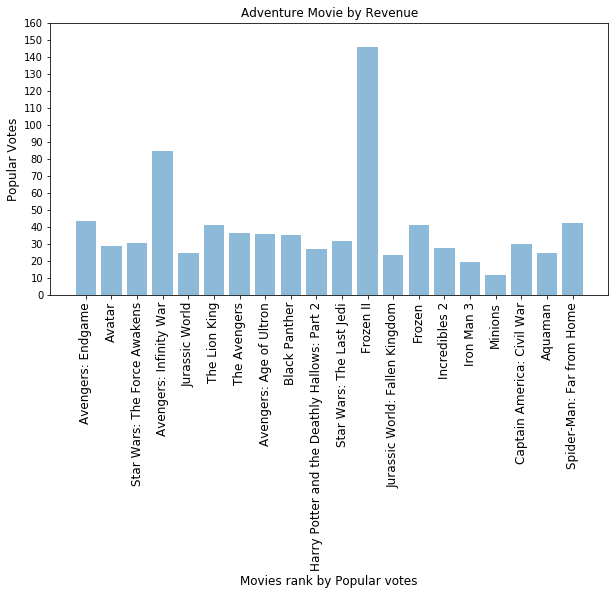

In [205]:
new_figure = plt.figure(figsize= (10,5))
objects = df_rev['title']
# y_pos = np.arange(len(objects))
popularity= df_rev['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize=12)
plt.yticks(np.arange(0, 170, step=10))
plt.ylabel('Popular Votes',fontsize=12)
plt.xlabel('Movies rank by Popular votes',fontsize=12)
plt.title('Adventure Movie by Revenue',fontsize=12)

plt.show()


In [51]:
#In the list revenue_com I am looping through the URL for each page in the genre. We already sorted by revenue in a desending order

revenue_com = []
for i in range(1,20):
    revenue_com.append(str(f'https://api.themoviedb.org/3/discover/movie?api_key={config.api_key}&language=en-US&sort_by=revenue.desc&page={i}&with_genres=35&with_original_language=en'))


In [52]:
#I am getting the request for each API URL and adding to a new list.
revenue_moviescom = []
 for page in revenue_com:
    revenue_moviescom.append(requests.get(page))

In [53]:
#From the previous list adv_movies I have sucessfully been approved access and now in the new list revenue_moviescom.
#I am converting my data into json file to read the data.
for movie in revenue_moviescom:
    revenuecom_json.append(movie.json())

In [54]:
#From the previous list that has been converted to a json file, our first three columns were unnecessary information 
#page number,total pages and total movies. We only needed the information in column results therefore we are only
#reaching into the json file and pulling all the information under results.
results = []
for item in revenuecom_json:
    results = results + item['results']

In [221]:
df4 = pd.DataFrame(results)
df4

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,1194.115,597,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",A Rainy Day in New York,6.7,Two young people arrive in New York to spend a...,2019-07-26
1,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",Jumanji: The Next Level,6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,205.794,568,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",Sonic the Hedgehog,7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",Spies in Disguise,7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",Charlie's Angels,6.4,When a systems engineer blows the whistle on a...,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.271,11,False,/qfd3Grd0ZSTSOM0Zy7wx82yDGjt.jpg,64152,False,/9npcUo0fmdlFeuOqVu9xphZBVh5.jpg,en,Garfield: His 9 Lives,"[16, 35, 12]",Garfield: His 9 Lives,6.0,Garfield plays multiple roles including ancien...,1988-11-22
9996,1.433,12,False,/r2CJKo3bO3sGH9P6a0MOw4NG1sM.jpg,77566,False,/vy1mN7gQxwqSg5BrtVgkWMW6lU9.jpg,en,Safety Second,"[35, 16]",Safety Second,6.0,"It's Independence Day, and Jerry's little neph...",1950-07-01
9997,1.320,13,False,/1U4K5FYViv3PvPofin257UiAdch.jpg,57836,False,/tm4DwS9Q8l1uqMIicJgccGPjIX4.jpg,en,حسن ومرقص,"[35, 18]",Hassan and Murqus,5.7,,2008-07-03
9998,1.315,5,False,/3ne6hQCRwwUoiIVyHYgH7dLhDs.jpg,50105,False,/eHwN90iG3eO6B0HPk0GCdtfMIrL.jpg,en,Coopers' Camera,[35],Coopers' Camera,5.4,"Using a professional grade video camera, a dys...",2009-11-27


In [222]:
df4.set_index('title', inplace = True)
#Bringing the column title to the front to make it easier to read the data. 

In [223]:
df4.reset_index(inplace=True)
#Resetting the data for when we need to access the column title as it is not possible to access the index.

In [224]:
df4

,title,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,vote_average,overview,release_date
0,A Rainy Day in New York,1194.115,597,False,/uPGq1mkEXznUpapDmOSxbsybjfp.jpg,475303,False,/6fkqwqLEcDZOEAnBBfKAniwNxtx.jpg,en,A Rainy Day in New York,"[35, 10749]",6.7,Two young people arrive in New York to spend a...,2019-07-26
1,Jumanji: The Next Level,267.705,1938,False,/bB42KDdfWkOvmzmYkmK58ZlCa9P.jpg,512200,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,en,Jumanji: The Next Level,"[28, 12, 35, 14]",6.8,As the gang return to Jumanji to rescue one of...,2019-12-04
2,Sonic the Hedgehog,205.794,568,False,/aQvJ5WPzZgYVDrxLX4R6cLJCEaQ.jpg,454626,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,en,Sonic the Hedgehog,"[28, 35, 878, 10751]",7.2,Based on the global blockbuster videogame fran...,2020-02-12
3,Spies in Disguise,104.718,234,False,/30YacPAcxpNemhhwX0PVUl9pVA3.jpg,431693,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,en,Spies in Disguise,"[28, 12, 16, 35]",7.3,Super spy Lance Sterling and scientist Walter ...,2019-12-24
4,Charlie's Angels,99.886,561,False,/1DPUFG6QnGqzpvEaDEv7TaepycM.jpg,458897,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,en,Charlie's Angels,"[28, 12, 35]",6.4,When a systems engineer blows the whistle on a...,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Garfield: His 9 Lives,1.271,11,False,/qfd3Grd0ZSTSOM0Zy7wx82yDGjt.jpg,64152,False,/9npcUo0fmdlFeuOqVu9xphZBVh5.jpg,en,Garfield: His 9 Lives,"[16, 35, 12]",6.0,Garfield plays multiple roles including ancien...,1988-11-22
9996,Safety Second,1.433,12,False,/r2CJKo3bO3sGH9P6a0MOw4NG1sM.jpg,77566,False,/vy1mN7gQxwqSg5BrtVgkWMW6lU9.jpg,en,Safety Second,"[35, 16]",6.0,"It's Independence Day, and Jerry's little neph...",1950-07-01
9997,Hassan and Murqus,1.320,13,False,/1U4K5FYViv3PvPofin257UiAdch.jpg,57836,False,/tm4DwS9Q8l1uqMIicJgccGPjIX4.jpg,en,حسن ومرقص,"[35, 18]",5.7,,2008-07-03
9998,Coopers' Camera,1.315,5,False,/3ne6hQCRwwUoiIVyHYgH7dLhDs.jpg,50105,False,/eHwN90iG3eO6B0HPk0GCdtfMIrL.jpg,en,Coopers' Camera,[35],5.4,"Using a professional grade video camera, a dys...",2009-11-27


In [225]:
df4.drop(df4[df4['popularity'] > 1000.0].index, inplace = True)
#I had to drop run this code because there was an outlier. The movie A Rainy Day in New York had a popular vote of 1,900. 

In [279]:
#Making a new variable of the first 40 movies to later on access only the id movie codes as a smaller dataset.
df4clean = df4.head(40)


In [228]:
df4.describe()

,popularity,vote_count,id,vote_average
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,5.401201,303.535654,144364.716072,5.799860
std,5.724051,985.512159,183663.616620,1.527767
min,0.706000,0.000000,5.000000,0.000000
25%,2.385000,12.000000,18893.000000,5.300000
50%,3.715000,32.000000,46026.000000,6.000000
75%,7.851000,141.000000,244333.500000,6.700000
max,267.705000,21911.000000,679014.000000,10.000000


In [229]:
df_revcom = df4[['title','popularity']].head(20) 
df_revcom
#Making a new dataset for only movie title and popularity. 

,title,popularity
1,Jumanji: The Next Level,267.705
2,Sonic the Hedgehog,205.794
3,Spies in Disguise,104.718
4,Charlie's Angels,99.886
5,Knives Out,83.715
6,Guns Akimbo,79.446
7,Birds of Prey (and the Fantabulous Emancipatio...,93.026
8,Jojo Rabbit,65.884
9,Onward,60.374
10,Zombieland: Double Tap,39.758


In [230]:
df_revcom.describe()

,popularity
count,20.000000
mean,77.186950
std,59.725565
min,33.062000
25%,42.142250
50%,55.935500
75%,86.042750
max,267.705000


In [231]:
df_revcom['title']

1                               Jumanji: The Next Level
2                                    Sonic the Hedgehog
3                                     Spies in Disguise
4                                      Charlie's Angels
5                                            Knives Out
6                                           Guns Akimbo
7     Birds of Prey (and the Fantabulous Emancipatio...
8                                           Jojo Rabbit
9                                                Onward
10                               Zombieland: Double Tap
11                                                 Cars
12                       Once Upon a Time… in Hollywood
13                                    The Addams Family
14                                             Hustlers
15                                              Aladdin
16                                             Dolittle
17                    Spider-Man: Into the Spider-Verse
18                    To All the Boys I've Loved

In [232]:
df_revcom['popularity']

1     267.705
2     205.794
3     104.718
4      99.886
5      83.715
6      79.446
7      93.026
8      65.884
9      60.374
10     39.758
11     61.253
12     51.497
13     48.834
14     33.062
15     48.934
16     49.851
17     37.669
18     42.937
19     34.520
20     34.876
Name: popularity, dtype: float64

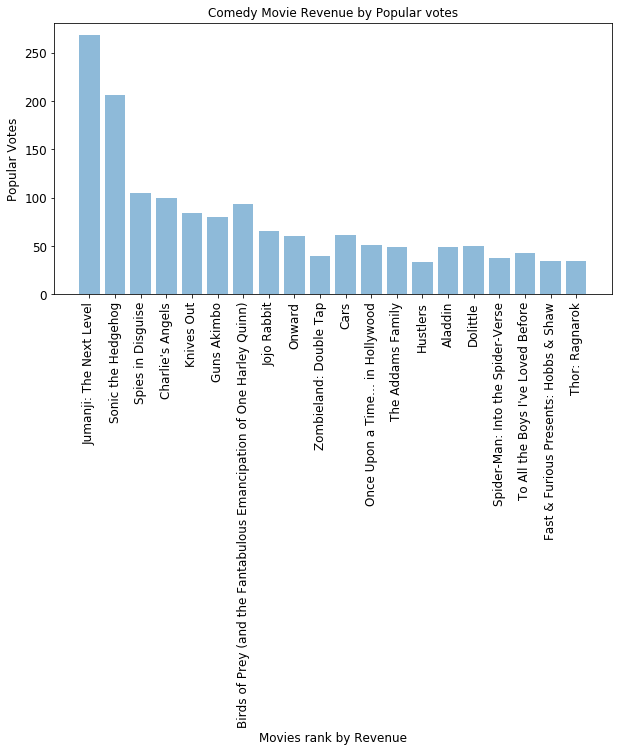

In [237]:
new_figure = plt.figure(figsize= (10,5))
objects = df_revcom['title']
# y_pos = np.arange(len(objects))
popularity= df_revcom['popularity']

plt.bar(objects, popularity, align='center', alpha=0.5)
plt.xticks(objects,rotation=90, rotation_mode="default", fontsize= 12)
plt.yticks(np.arange(0, 290, step=50),fontsize= 12)
plt.ylabel('Popular Votes',fontsize= 12)
plt.xlabel('Movies rank by Revenue',fontsize= 12)
plt.title('Comedy Movie Revenue by Popular votes',fontsize= 12)

plt.show()


## Budget of Adventure and Comedy Movies sorted by Highest Revenue

In [67]:
id_list=list(df3['id'].values)

In [68]:
#In the list budget_adv I am looping through the movie id from the df3 to access the movie details. We already sorted by revenue in a desending order based on the order 
#of df3
budget_adv = []
for movieid in id_list:
    budget_adv.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [138]:
#budget_adv 

In [70]:
#I am getting the request for each API URL and adding to a new list.

budget_movies = []
 for page in budget_adv:
    budget_movies.append(requests.get(page))

In [71]:
#From the previous list budget_movies I have sucessfully been approved access and now in the new list budget_json 
#I am converting my data into json file to read the data.
#reaching into the json file and pulling all the information under results
budget_json = []
for movie in budget_movies:
    budget_json.append(movie.json())

In [139]:
#budget_json

In [73]:
dfbu = pd.DataFrame(budget_json)
#converting to a dataframe

In [74]:
dfbu.set_index('title', inplace = True)

In [76]:
dfbu.reset_index(inplace= True)

In [77]:
#dfbu.drop(columns=['index'] , inplace= True)

In [238]:
dfbu

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Avengers: Endgame,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2797800564,181,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Part of the journey is the end.,False,8.3,11420
1,Avatar,False,/aHcth2AXzZSjhX7JYh7ie73YVNc.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.4,20401
2,Star Wars: The Force Awakens,False,/c2Ax8Rox5g6CneChwy1gmu4UbSb.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a story.,False,7.4,13872
3,Avengers: Infinity War,False,/bOGkgRGdhrBYJSLpXaxhXVstddV.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2046239637,149,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An entire universe. Once and for all.,False,8.3,16908
4,Jurassic World,False,/t5KONotASgVKq4N19RyhIthWOPG.jpg,"{'id': 328, 'name': 'Jurassic Park Collection'...",150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.jurassicworld.com/,135397,tt0369610,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-06,1671713208,124,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The park is open.,False,6.6,15090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Storks,False,/yziCg46YIvmWAvPdztuZQqNBinW.jpg,None,70000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.storks-movie.net/,332210,tt4624424,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-09-22,182379278,87,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Find Your Flock,False,6.6,1470
363,Poseidon,False,/tUGSLoMcxNWZ0OIRSqDaB2jNbdE.jpg,None,160000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www2.warnerbros.com/poseidon/,503,tt0409182,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-05-10,181674817,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Mayday,False,5.7,1176
364,Scooby-Doo 2: Monsters Unleashed,False,/2vRVzvqY0tydcStBkNn73JPPOPL.jpg,"{'id': 86860, 'name': 'Scooby-Doo Collection',...",0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 14, '...",,11024,tt0331632,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2004-03-24,181466833,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They came. They saw. They ran.,False,5.7,1472
365,Allegiant,False,/p1dkPKpHJ32FvhKZSAUdA1JSYFi.jpg,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2016-03-09,179246868,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,False,6.0,4578


In [81]:
adv_budget= dfbu[['title','budget']].head(20)
adv_budget
#Making a new dataframe of only title and budget. 

,title,budget
0,Avengers: Endgame,356000000
1,Avatar,237000000
2,Star Wars: The Force Awakens,245000000
3,Avengers: Infinity War,300000000
4,Jurassic World,150000000
5,The Lion King,260000000
6,The Avengers,220000000
7,Avengers: Age of Ultron,280000000
8,Black Panther,200000000
9,Harry Potter and the Deathly Hallows: Part 2,125000000


In [239]:
adv_budget.describe()

,budget
count,2.000000e+01
mean,1.980000e+08
std,7.544255e+07
min,3.300000e+07
25%,1.575000e+08
50%,2.000000e+08
75%,2.412500e+08
max,3.560000e+08


In [82]:
adv_budget['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [83]:
adv_budget['budget']

0     356000000
1     237000000
2     245000000
3     300000000
4     150000000
5     260000000
6     220000000
7     280000000
8     200000000
9     125000000
10    200000000
11     33000000
12    170000000
13    150000000
14    200000000
15    200000000
16     74000000
17    240000000
18    160000000
19    160000000
Name: budget, dtype: int64

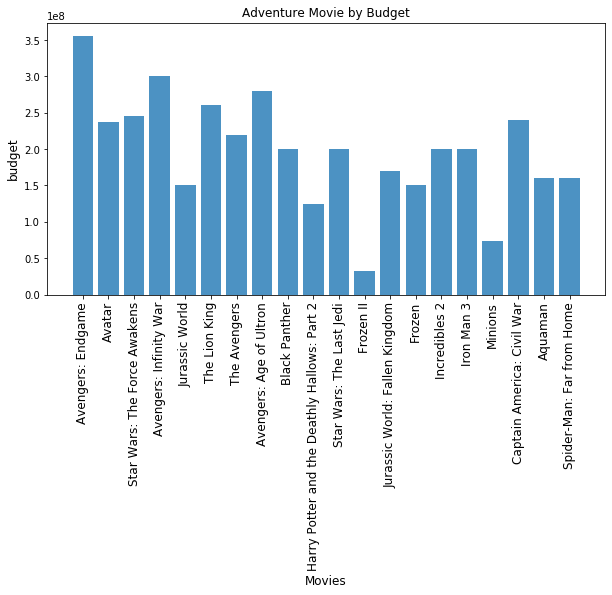

In [210]:
new_figure = plt.figure(figsize= (10,5))
objects = adv_budget['title']
# y_pos = np.arange(len(objects))
budget= adv_budget['budget']

plt.bar(objects, budget, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize =12)
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('budget',fontsize =12)
plt.xlabel('Movies',fontsize =12)
plt.title('Adventure Movie by Budget',fontsize =12)

plt.show()

In [280]:
#Making a list of the movie id from the dataframe df4.
id_listcom2=list(df4clean['id'].values)

In [281]:
#In the list budget_adv I am looping through the movie id from the df4 to access the movie details. We already sorted by revenue in a desending order based on the order 
#of df4
budget_com = []
for movieid in id_listcom2:
    budget_com.append(str(f'https://api.themoviedb.org/3/movie/{movieid}?api_key={config.api_key}&language=en-US'))
   

In [282]:
#I am getting the request for each API URL and adding to a new list.
budget_comedymovies = []
for page in budget_com:
    budget_comedymovies.append(requests.get(page))

In [283]:
#From the previous list budget_comedymovies I have sucessfully been approved access and now in the new list budgetcomedy_json 
#I am converting my data into json file to read the data.
budgetcomedy_json = []
for movie in budget_comedymovies:
    budgetcomedy_json.append(movie.json())

In [284]:
dfcomedybudget = pd.DataFrame(budgetcomedy_json)

In [285]:
dfcomedybudget.set_index('title', inplace = True)

In [286]:
dfcomedybudget.reset_index(inplace=True)

In [287]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Jumanji: The Next Level,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",125000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://jumanjimovie.com,512200,tt7975244,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-04,310830000,123,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,False,6.8,1971
1,Sonic the Hedgehog,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,None,85000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",,454626,tt3794354,en,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2020-02-12,265493652,99,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Whole New Speed of Hero,False,7.2,587
2,Spies in Disguise,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,None,111000000,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://family.foxmovies.com/movies/spies-in-d...,431693,tt5814534,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-24,0,102,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Super Spy. Super Fly.,False,7.2,246
3,Charlie's Angels,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,None,48000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.charliesangels.movie/,458897,tt5033998,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-11-14,70960003,118,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Unseen. Undivided. Unstoppable.,False,6.4,576
4,Knives Out,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,None,40000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",https://www.knivesout.movie/,546554,tt8946378,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-11-27,163700000,131,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,"Hell, any of them could have done it.",False,7.8,2511
5,Guns Akimbo,False,/gL7TV2g9y9p3v7occ5bLrJ2p1qs.jpg,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...",,457335,tt6902676,en,...,"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2020-02-27,0,95,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Get loaded,False,6.3,50
6,Birds of Prey (and the Fantabulous Emancipatio...,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,None,75000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.birdsofpreymovie.net/,495764,tt7713068,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-02-05,189532223,109,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mind Over Mayhem,False,6.8,941
7,Jojo Rabbit,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,None,14000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10752, '...",http://www.foxsearchlight.com/jojorabbit,515001,tt2584384,en,...,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",2019-10-18,82468705,108,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An anti-hate satire.,False,8.1,2232
8,Onward,False,/bcT8CaBIj086WVD7K529h78eujb.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",,508439,tt7146812,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-02-29,0,103,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,False,8.1,39
9,Zombieland: Double Tap,False,/3ghImmHdp4RnC3UkL6hpLayclnb.jpg,"{'id': 537982, 'name': 'Zombieland Collection'...",42000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.zombieland.com/,338967,tt1560220,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-10-09,122801777,99,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,False,6.9,1561


In [289]:
#I had to drop multiple rows in the dataframe because the budget was 0 therefore
#TMDB did not have the budget 
dfcomedybudget.drop(dfcomedybudget[dfcomedybudget['budget'] < 1].index, inplace = True)

In [290]:
dfcomedybudget

,title,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
0,Jumanji: The Next Level,False,/hreiLoPysWG79TsyQgMzFKaOTF5.jpg,"{'id': 495527, 'name': 'Jumanji Collection', '...",125000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://jumanjimovie.com,512200,tt7975244,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-04,310830000,123,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,False,6.8,1971
1,Sonic the Hedgehog,False,/qonBhlm0UjuKX2sH7e73pnG0454.jpg,None,85000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",,454626,tt3794354,en,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2020-02-12,265493652,99,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Whole New Speed of Hero,False,7.2,587
2,Spies in Disguise,False,/qlYxtqVfu2LOdvYMMDPCSGX0Oz0.jpg,None,111000000,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",https://family.foxmovies.com/movies/spies-in-d...,431693,tt5814534,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-12-24,0,102,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Super Spy. Super Fly.,False,7.2,246
3,Charlie's Angels,False,/a0xTB1vBxMGt6LGG4N7k1wO9lfL.jpg,None,48000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.charliesangels.movie/,458897,tt5033998,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-11-14,70960003,118,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Unseen. Undivided. Unstoppable.,False,6.4,576
4,Knives Out,False,/cjTQSwcsfVdirSFSHNBXRGkxmWa.jpg,None,40000000,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",https://www.knivesout.movie/,546554,tt8946378,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-11-27,163700000,131,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,"Hell, any of them could have done it.",False,7.8,2511
6,Birds of Prey (and the Fantabulous Emancipatio...,False,/uozb2VeD87YmhoUP1RrGWfzuCrr.jpg,None,75000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.birdsofpreymovie.net/,495764,tt7713068,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2020-02-05,189532223,109,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mind Over Mayhem,False,6.8,941
7,Jojo Rabbit,False,/agoBZfL1q5G79SD0npArSlJn8BH.jpg,None,14000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10752, '...",http://www.foxsearchlight.com/jojorabbit,515001,tt2584384,en,...,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...",2019-10-18,82468705,108,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,An anti-hate satire.,False,8.1,2232
9,Zombieland: Double Tap,False,/3ghImmHdp4RnC3UkL6hpLayclnb.jpg,"{'id': 537982, 'name': 'Zombieland Collection'...",42000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.zombieland.com/,338967,tt1560220,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2019-10-09,122801777,99,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,,False,6.9,1561
10,Cars,False,/a1MlbLBk5Sy6YvMbSuKfwGlDVlb.jpg,"{'id': 87118, 'name': 'Cars Collection', 'post...",120000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",http://disney.go.com/disneyvideos/animatedfilm...,920,tt0317219,en,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-08,461983149,117,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Ahhh... it's got that new movie smell.,False,6.7,8782
11,Once Upon a Time… in Hollywood,False,/er1S5nJyDSkmy7i2KkPMBjbwK8x.jpg,None,95000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",https://www.onceuponatimeinhollywood.movie,466272,tt7131622,en,...,"[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2019-07-25,374251247,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"In this town, it can all change… like that",False,7.5,4868


In [291]:
dfcomedybudget__ = dfcomedybudget[['title','budget']].head(20) 
dfcomedybudget__ 

,title,budget
0,Jumanji: The Next Level,125000000
1,Sonic the Hedgehog,85000000
2,Spies in Disguise,111000000
3,Charlie's Angels,48000000
4,Knives Out,40000000
6,Birds of Prey (and the Fantabulous Emancipatio...,75000000
7,Jojo Rabbit,14000000
9,Zombieland: Double Tap,42000000
10,Cars,120000000
11,Once Upon a Time… in Hollywood,95000000


In [292]:
dfcomedybudget__.describe()

,budget
count,2.000000e+01
mean,1.000700e+08
std,6.266345e+07
min,1.400000e+07
25%,4.150000e+07
50%,9.250000e+07
75%,1.675000e+08
max,2.000000e+08


In [293]:
dfcomedybudget__['title']

0                               Jumanji: The Next Level
1                                    Sonic the Hedgehog
2                                     Spies in Disguise
3                                      Charlie's Angels
4                                            Knives Out
6     Birds of Prey (and the Fantabulous Emancipatio...
7                                           Jojo Rabbit
9                                Zombieland: Double Tap
10                                                 Cars
11                       Once Upon a Time… in Hollywood
12                                    The Addams Family
13                                             Hustlers
14                                              Aladdin
15                                             Dolittle
16                    Spider-Man: Into the Spider-Verse
18                Fast & Furious Presents: Hobbs & Shaw
19                                       Thor: Ragnarok
20                                        The Ge

In [294]:
dfcomedybudget__['budget']

0     125000000
1      85000000
2     111000000
3      48000000
4      40000000
6      75000000
7      14000000
9      42000000
10    120000000
11     95000000
12     40000000
13     20000000
14    183000000
15    175000000
16     90000000
18    200000000
19    180000000
20     18400000
21    175000000
22    165000000
Name: budget, dtype: int64

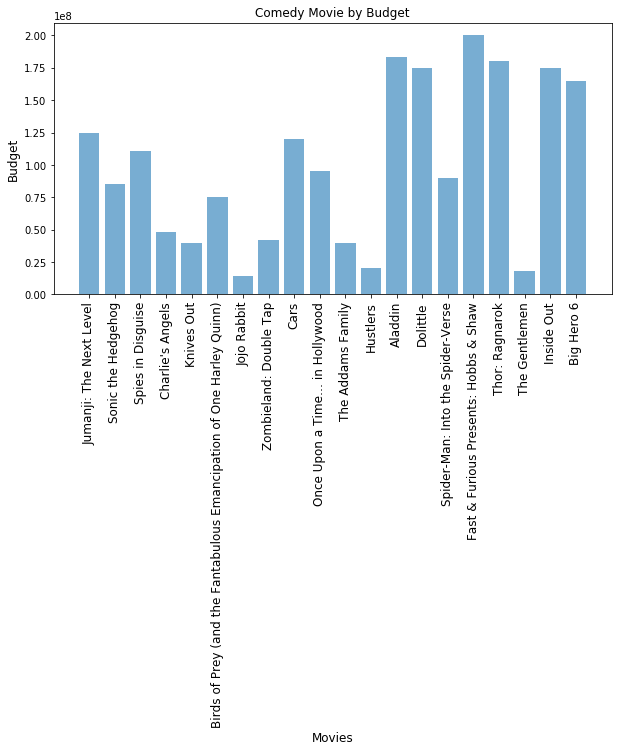

In [295]:
new_figure = plt.figure(figsize= (10,5))
objects = dfcomedybudget__['title']
# y_pos = np.arange(len(objects))
budget= dfcomedybudget__['budget']

plt.bar(objects, budget, align='center', alpha=0.6)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
#plt.yticks(np.arange(0, 356000000)) #step=10000 
plt.ylabel('Budget',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Comedy Movie by Budget',fontsize=12)

plt.show()


# Runtime of Adventure and Comedy Movies sorted by Highest Revenue


In [296]:
#From the datafram dfbu I am pulling title column and the runtime of the movies which are sorted by revenue. 
adv_run= dfbu[['title','runtime']].head(20)
adv_run

,title,runtime
0,Avengers: Endgame,181
1,Avatar,162
2,Star Wars: The Force Awakens,136
3,Avengers: Infinity War,149
4,Jurassic World,124
5,The Lion King,118
6,The Avengers,143
7,Avengers: Age of Ultron,141
8,Black Panther,134
9,Harry Potter and the Deathly Hallows: Part 2,130


In [297]:
adv_run['title']

0                                Avengers: Endgame
1                                           Avatar
2                     Star Wars: The Force Awakens
3                           Avengers: Infinity War
4                                   Jurassic World
5                                    The Lion King
6                                     The Avengers
7                          Avengers: Age of Ultron
8                                    Black Panther
9     Harry Potter and the Deathly Hallows: Part 2
10                        Star Wars: The Last Jedi
11                                       Frozen II
12                  Jurassic World: Fallen Kingdom
13                                          Frozen
14                                   Incredibles 2
15                                      Iron Man 3
16                                         Minions
17                      Captain America: Civil War
18                                         Aquaman
19                       Spider

In [298]:
adv_run['runtime']

0     181
1     162
2     136
3     149
4     124
5     118
6     143
7     141
8     134
9     130
10    152
11    104
12    129
13    102
14    118
15    131
16     91
17    147
18    144
19    129
Name: runtime, dtype: int64

In [299]:
adv_run.describe()

,runtime
count,20.000000
mean,133.250000
std,21.018476
min,91.000000
25%,122.500000
50%,132.500000
75%,144.750000
max,181.000000


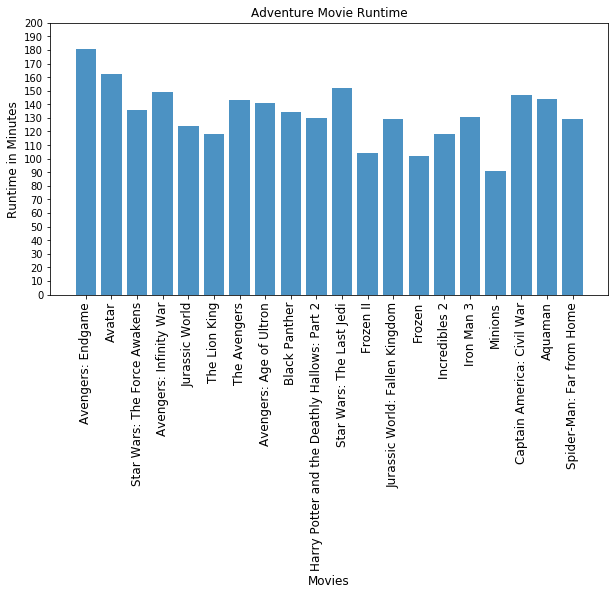

In [300]:
new_figure = plt.figure(figsize= (10,5))
objects = adv_run['title']
# y_pos = np.arange(len(objects))
runtime= adv_run['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 210, step=10))
plt.ylabel('Runtime in Minutes',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Adventure Movie Runtime',fontsize=12)

plt.show()

In [301]:
#I am making a new datatframe from the dataframe dfcomedybudget but only accessing title and runtime
comrun = dfcomedybudget[['title','runtime']].head(20)
comrun

,title,runtime
0,Jumanji: The Next Level,123
1,Sonic the Hedgehog,99
2,Spies in Disguise,102
3,Charlie's Angels,118
4,Knives Out,131
6,Birds of Prey (and the Fantabulous Emancipatio...,109
7,Jojo Rabbit,108
9,Zombieland: Double Tap,99
10,Cars,117
11,Once Upon a Time… in Hollywood,162


In [302]:
comrun['title']

0                               Jumanji: The Next Level
1                                    Sonic the Hedgehog
2                                     Spies in Disguise
3                                      Charlie's Angels
4                                            Knives Out
6     Birds of Prey (and the Fantabulous Emancipatio...
7                                           Jojo Rabbit
9                                Zombieland: Double Tap
10                                                 Cars
11                       Once Upon a Time… in Hollywood
12                                    The Addams Family
13                                             Hustlers
14                                              Aladdin
15                                             Dolittle
16                    Spider-Man: Into the Spider-Verse
18                Fast & Furious Presents: Hobbs & Shaw
19                                       Thor: Ragnarok
20                                        The Ge

In [303]:
comrun['runtime']

0     123
1      99
2     102
3     118
4     131
6     109
7     108
9      99
10    117
11    162
12     86
13    107
14    128
15    101
16    117
18    137
19    131
20    113
21     95
22    102
Name: runtime, dtype: int64

In [304]:
comrun.describe()

,runtime
count,20.000000
mean,114.250000
std,17.597473
min,86.000000
25%,101.750000
50%,111.000000
75%,124.250000
max,162.000000


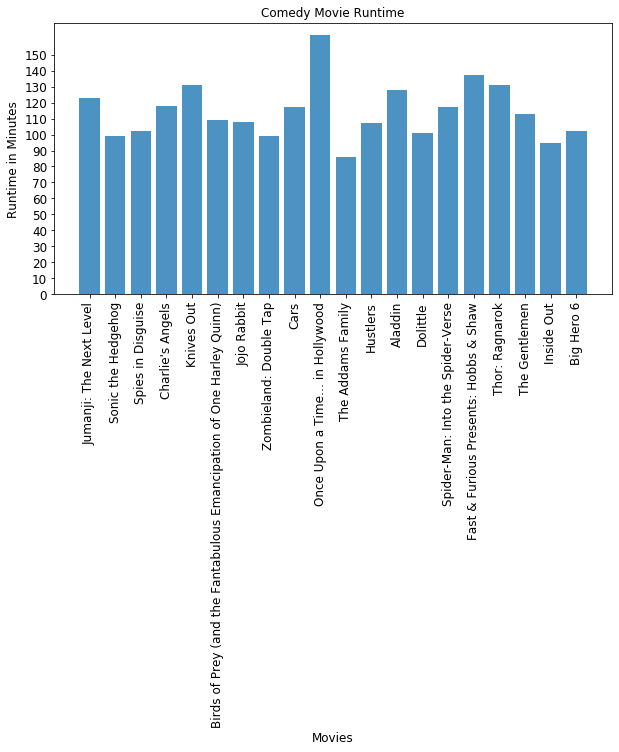

In [305]:
new_figure = plt.figure(figsize= (10,5))
objects = comrun['title']
# y_pos = np.arange(len(objects))
runtime= comrun['runtime']

plt.bar(objects, runtime, align='center', alpha=0.8)
plt.xticks(objects,rotation=90, rotation_mode="default",fontsize=12)
plt.yticks(np.arange(0, 160, step=10),fontsize=12)
plt.ylabel('Runtime in Minutes',fontsize=12)
plt.xlabel('Movies',fontsize=12)
plt.title('Comedy Movie Runtime',fontsize=12)

plt.show()